In [1]:
import numpy as np
import pandas as pd

In [2]:
df_hbo = pd.read_csv('hbo.csv')
df_claro = pd.read_csv('claro.csv')
df_sony = pd.read_csv('sony.csv')
df_netflix = pd.read_csv('netflix.csv')
df_flow = pd.read_csv('flow.csv')
df_amazon = pd.read_csv('amazon.csv')
df_on_video = pd.read_csv('on_video.csv')
df_fox = pd.read_csv('fox.csv')

In [3]:
df_hbo.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"['Acción', 'Crimen', 'Suspense']",['John Singleton'],"['miami', 'car race', 'sports car', 'los angel...","['Paul Walker', 'Tyrese Gibson', 'Eva Mendes',...",32
1,2,2,1457,21 gramos,21 Grams,"['Drama', 'Crimen', 'Suspense']",['Alejandro González Iñárritu'],"['life and death', 'loss of loved one', 'trans...","['Sean Penn', 'Naomi Watts', 'Benicio del Toro...",31


In [4]:
df_claro.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty
0,0,0,44,500 dias juntos,(500) Days of Summer,"['Comedia', 'Drama', 'Romance']",['Marc Webb'],"['date', 'jealousy', 'fight', 'architect', 'ga...","['Joseph Gordon-Levitt', 'Zooey Deschanel', 'C...",31
1,2,2,49,Nuestros maravillosos aliados,*batteries not included,"['Comedia', 'Familia', 'Fantasía', 'Ciencia fi...",['Matthew Robbins'],"['extraterrestrial technology', 'alien life-fo...","['Hume Cronyn', 'Jessica Tandy', 'Frank McRae'...",53


In [5]:
print(len(df_hbo.index))
print(len(df_claro.index))
print(len(df_amazon.index))
print(len(df_netflix.index))
print(len(df_flow.index))
print(len(df_on_video.index))
print(len(df_sony.index))
print(len(df_fox.index))

140
1758
774
1611
374
314
56
241


In [6]:
# ===> Unimos los diferentes dataframes

frames = [df_hbo, df_claro, df_amazon, df_netflix, df_flow, df_on_video, df_sony, df_fox]

df = pd.concat(frames)

In [7]:
print(len(df.index))

5268


In [8]:
df = df.drop_duplicates(subset=['id'])

In [9]:
print(len(df.index)) # Pareciera que no se comparten tantas peliculas

4478


In [10]:
df['genres']=df['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['genres']=df['genres'].str.split(',')

df['keywords']=df['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['keywords']=df['keywords'].str.split(',')

df['director']=df['director'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['director']=df['director'].str.split(',')

df['cast']=df['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['cast']=df['cast'].str.split(',')

In [11]:
# ===> Vamos a crear el vector a partir de los datos en el array de una columna

# ===> Creamos la lista de valores unicos

def create_unique_list(dataframe, column):
    
    list_unique_items = []
    
    for index, row in dataframe.iterrows():
        list_items = row[column]
    
        for item in list_items:
            if item not in list_unique_items:
                list_unique_items.append(item)
            
    return list_unique_items

# ===> binary va iterar sobre los valores de un array y chequear que valores estan en la lista de valores unicos

def binary(list_items, list_unique_items):
    
    binaryList = []
    
    for item in list_unique_items:
        if item in list_items:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

# ===> create_vector nos va a devolver el dataframe con una nueva columna, que representa un vector binario del atributo
# ===> en cuestion (genero, cast, director, etc)

def create_vector(dataframe, column_name):
    
    unique_list = create_unique_list(dataframe, column_name)
    
    column_name_vector = column_name + '_bin'
    
    dataframe[column_name_vector] = dataframe[column_name].apply(lambda x: binary(x, unique_list))
    
    return dataframe

In [12]:
df = create_vector(df, 'keywords')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [13]:
df = create_vector(df, 'genres')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin,genres_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [14]:
df = create_vector(df, 'director')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin,genres_bin,director_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [15]:
df = create_vector(df, 'cast')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin,genres_bin,director_bin,cast_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."


In [16]:
# ===> Tenemos el dataframe con todas las peliculas. Vamos a crear una columna que sea una combinacion
# ===> de todos los bins del dataframe

df['combination_bin'] = df['genres_bin'] + df['cast_bin'] +  df['keywords_bin'] + df['director_bin']

In [17]:
# ===> Transformamos esa columna en numpy array de dos dimensiones, lo cual es necesario para poder utilizar esa info
# ===> como inputs de modelos de clustering

df_kmeans = np.vstack(df['combination_bin'])

In [18]:
# ===> Nuestro dataframe tiene 22443 dimensiones

print(len(df_kmeans[0]))

22443


In [19]:
# ===> Vamos a usar SVD para reducir la dimensionalidad de nuestro dataframe
# ===> Otra opcion https://www.researchgate.net/post/Which_clustering_technique_is_most_suitable_for_high_dimensional_data_sets

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(50)
df_transformed = svd.fit_transform(df_kmeans)

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabaz_score

In [21]:
kmeans_final = KMeans(n_clusters=25, random_state=0) 
kmeans_final.fit(df_kmeans)
    
labels_final = kmeans_final.labels_

In [22]:
df['labels'] = labels_final

In [23]:
print(df['labels'].unique())

[ 4 21  8 23  7 19 10  3 12 20  0 15  6 24  9  2 11 16 14 18 13 22  5  1
 17]


In [24]:
print(df['labels'].value_counts())

23    841
4     563
12    517
7     447
19    393
21    322
0     270
8     264
10    248
6     172
3     161
20    137
15     93
9      15
2      12
5       4
18      3
24      3
11      3
14      3
22      3
13      1
1       1
17      1
16      1
Name: labels, dtype: int64


In [25]:
def add_cluster_if_not_present(dataframe, list_clusters_complete):
    
    list_clusters = dataframe['labels'].unique()
    
    for item in list_clusters_complete:
        
        if item not in list_clusters:
            
            dataframe = dataframe.append({'labels': item, 'frecuency': 0}, ignore_index=True)
            
    return dataframe
    

In [26]:
# ===> Aanaliamos que % de las peliculas de cada plataforma pertenecen a cada cluster

def count_clusters(dataframe, name_plataform):

    df_clusters = pd.DataFrame(dataframe['labels'].value_counts())
    
    df_clusters = df_clusters.rename(columns={'labels': 'frecuency'})
    
    df_clusters['labels'] = df_clusters.index
    
    df_clusters = add_cluster_if_not_present(df_clusters, df['labels'].unique())
    
    def number_rows_parent_dataframe(dataframe):
        return len(dataframe.index)

    def cluster_porcentage(value, dataframe=dataframe):
        return value/number_rows_parent_dataframe(dataframe)*100
    
    name_column = 'percentage_clusters_' + name_plataform 
    
    df_clusters[name_column] = df_clusters['frecuency'].apply(cluster_porcentage)

    return df_clusters


In [27]:
# ===> Agregamos las etiquetas de clusters a la plataforma HBO

df_hbo = pd.merge(df_hbo, df[['id', 'labels']], on='id', how='left')

In [28]:
df_hbo.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,labels
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"['Acción', 'Crimen', 'Suspense']",['John Singleton'],"['miami', 'car race', 'sports car', 'los angel...","['Paul Walker', 'Tyrese Gibson', 'Eva Mendes',...",32,4
1,2,2,1457,21 gramos,21 Grams,"['Drama', 'Crimen', 'Suspense']",['Alejandro González Iñárritu'],"['life and death', 'loss of loved one', 'trans...","['Sean Penn', 'Naomi Watts', 'Benicio del Toro...",31,4


In [29]:
clusters_hbo = count_clusters(df_hbo, 'hbo')
count_clusters(df_hbo, 'hbo').head(2)

,frecuency,labels,percentage_clusters_hbo
0,21,7,15.000000
1,17,23,12.142857


In [30]:
# ===> Agregamos las etiquetas de clusters a la plataforma Claro

df_claro = pd.merge(df_claro, df[['id', 'labels']], on='id', how='left')

In [31]:
df_claro.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,labels
0,0,0,44,500 dias juntos,(500) Days of Summer,"['Comedia', 'Drama', 'Romance']",['Marc Webb'],"['date', 'jealousy', 'fight', 'architect', 'ga...","['Joseph Gordon-Levitt', 'Zooey Deschanel', 'C...",31,12
1,2,2,49,Nuestros maravillosos aliados,*batteries not included,"['Comedia', 'Familia', 'Fantasía', 'Ciencia fi...",['Matthew Robbins'],"['extraterrestrial technology', 'alien life-fo...","['Hume Cronyn', 'Jessica Tandy', 'Frank McRae'...",53,10


In [32]:
clusters_claro = count_clusters(df_claro, 'claro')
count_clusters(df_claro, 'claro').head(2)

,frecuency,labels,percentage_clusters_claro
0,287,23,16.325370
1,260,4,14.789534


In [33]:
# ===> Agregamos las etiquetas de clusters a la plataforma Sony

df_sony = pd.merge(df_sony, df[['id', 'labels']], on='id', how='left')

In [34]:
clusters_sony = count_clusters(df_sony, 'sony')

count_clusters(df_sony, 'sony').head(2)

,frecuency,labels,percentage_clusters_sony
0,13,8,23.214286
1,9,23,16.071429


In [35]:
# ===> Agregamos las etiquetas de clusters a la plataforma Netflix

df_netflix = pd.merge(df_netflix, df[['id', 'labels']], on='id', how='left')

In [36]:
clusters_netflix = count_clusters(df_netflix, 'netflix')

count_clusters(df_netflix, 'netflix').head(2)

,frecuency,labels,percentage_clusters_netflix
0,307,7,19.056487
1,300,23,18.621974


In [37]:
# ===> Agregamos las etiquetas de clusters a la plataforma Flow

df_flow = pd.merge(df_flow, df[['id', 'labels']], on='id', how='left')

In [38]:
clusters_flow = count_clusters(df_flow, 'flow')

count_clusters(df_flow, 'flow').head(2)

,frecuency,labels,percentage_clusters_flow
0,67,23,17.914439
1,55,4,14.705882


In [39]:
# ===> Agregamos las etiquetas de clusters a la plataforma Amazon

df_amazon = pd.merge(df_amazon, df[['id', 'labels']], on='id', how='left')

In [40]:
clusters_amazon = count_clusters(df_amazon, 'amazon')

count_clusters(df_amazon, 'amazon').head(2)

,frecuency,labels,percentage_clusters_amazon
0,155,23,20.025840
1,104,19,13.436693


In [41]:
# ===> Agregamos las etiquetas de clusters a la plataforma On Video

df_on_video = pd.merge(df_on_video, df[['id', 'labels']], on='id', how='left')

In [42]:
clusters_on_video = count_clusters(df_on_video, 'on_video')

count_clusters(df_on_video, 'on_video').head(2)

,frecuency,labels,percentage_clusters_on_video
0,58,23,18.471338
1,41,12,13.057325


In [43]:
# ===> Agregamos las etiquetas de clusters a la plataforma Fox

df_fox = pd.merge(df_fox, df[['id', 'labels']], on='id', how='left')

In [44]:
clusters_fox = count_clusters(df_fox, 'fox')

count_clusters(df_fox, 'fox').head(2)

,frecuency,labels,percentage_clusters_fox
0,49,23,20.331950
1,45,12,18.672199


In [45]:
df_clusters_final = pd.merge(clusters_hbo[['labels', 'percentage_clusters_hbo']], clusters_claro[['labels', 'percentage_clusters_claro']], on='labels', how='left')

In [46]:
df_clusters_final.head(2)

,labels,percentage_clusters_hbo,percentage_clusters_claro
0,7,15.000000,2.445961
1,23,12.142857,16.325370


In [47]:
df_clusters_final = pd.merge(df_clusters_final, clusters_sony[['labels', 'percentage_clusters_sony']], on='labels', how='left')

In [48]:
df_clusters_final = pd.merge(df_clusters_final, clusters_netflix[['labels', 'percentage_clusters_netflix']], on='labels', how='left')

In [49]:
df_clusters_final = pd.merge(df_clusters_final, clusters_flow[['labels', 'percentage_clusters_flow']], on='labels', how='left')

In [50]:
df_clusters_final = pd.merge(df_clusters_final, clusters_amazon[['labels', 'percentage_clusters_amazon']], on='labels', how='left')

In [51]:
df_clusters_final = pd.merge(df_clusters_final, clusters_on_video[['labels', 'percentage_clusters_on_video']], on='labels', how='left')

In [52]:
df_clusters_final = pd.merge(df_clusters_final, clusters_fox[['labels', 'percentage_clusters_fox']], on='labels', how='left')

In [53]:
df_clusters_final.head(2)

,labels,percentage_clusters_hbo,percentage_clusters_claro,percentage_clusters_sony,percentage_clusters_netflix,percentage_clusters_flow,percentage_clusters_amazon,percentage_clusters_on_video,percentage_clusters_fox
0,7,15.000000,2.445961,0.000000,19.056487,4.545455,8.268734,2.547771,1.659751
1,23,12.142857,16.325370,16.071429,18.621974,17.914439,20.025840,18.471338,20.331950


In [54]:
print(df_clusters_final['labels'].values)

[ 7 23  4 21  8 20 12 19 10  6  0  3 15 24  9  2 11 16 14 18 13 22  5  1
 17]


In [55]:
df_clusters_final_transpose = df_clusters_final[['percentage_clusters_hbo',	'percentage_clusters_claro',	'percentage_clusters_sony',	'percentage_clusters_netflix'	,'percentage_clusters_flow',	'percentage_clusters_amazon',	'percentage_clusters_on_video',	'percentage_clusters_fox']].transpose()

In [56]:
df_clusters_final_transpose.columns = df_clusters_final['labels'].values

In [57]:
df_clusters_final_transpose.head(2)

,7,23,4,21,8,20,12,19,10,6,...,2,11,16,14,18,13,22,5,1,17
percentage_clusters_hbo,15.000000,12.142857,12.142857,8.571429,8.571429,7.857143,7.857143,7.142857,5.714286,4.285714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
percentage_clusters_claro,2.445961,16.325370,14.789534,8.646189,6.427759,2.901024,14.562002,7.565415,7.963595,5.290102,...,0.284414,0.113766,0.056883,0.113766,0.056883,0.056883,0.0,0.0,0.0,0.0


In [58]:
df_numpy_array_platforms = df_clusters_final_transpose.values

In [59]:
print(df_numpy_array_platforms)

[[15.         12.14285714 12.14285714  8.57142857  8.57142857  7.85714286
   7.85714286  7.14285714  5.71428571  4.28571429  4.28571429  3.57142857
   2.14285714  0.71428571  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 2.44596132 16.32536974 14.78953356  8.64618885  6.42775882  2.90102389
  14.56200228  7.56541524  7.96359499  5.29010239  3.69738339  4.89192264
   3.24232082  0.17064846  0.39817975  0.28441411  0.11376564  0.05688282
   0.11376564  0.05688282  0.05688282  0.          0.          0.
   0.        ]
 [ 0.         16.07142857 14.28571429  7.14285714 23.21428571  0.
  12.5         0.         14.28571429  5.35714286  3.57142857  3.57142857
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [19.05648665 18.62197393 10.73867163  6.64183737  5.09000621  2.6691496
   9.4972067   7.20049659  4.90378647  2.8

In [61]:
# ===> Graficamos las 8 plataformas en un espacio de dos dimensiones

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10, metric = 'cosine')
#tsne = TSNE(perplexity = 10, metric='precomputed', random_state = 12)

result = tsne.fit_transform(df_numpy_array_platforms)


In [62]:
platforms = ['HBO', 'Claro', 'Sony', 'Netflix', 'Flow', 'Amazon', 'On Video', 'Fox']

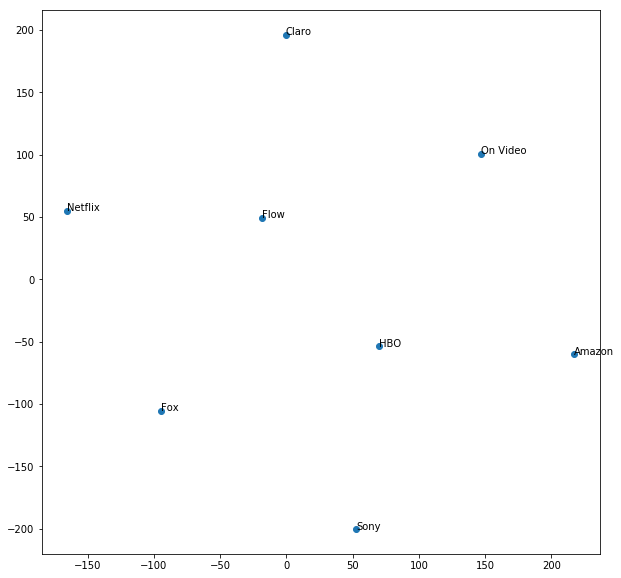

In [65]:
import matplotlib.pyplot as plt

# ===> La forma que se genera parece demasiado simetrica. Es raro, no?

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(result[:,0], result[:,1])

for i, txt in enumerate(platforms):
    ax.annotate(txt, (result[i,0], result[i,1]))

In [66]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(2)
clusters_transformed = svd.fit_transform(df_numpy_array_platforms)

In [67]:
print(clusters_transformed)

[[ 28.06116711  -6.92438856]
 [ 31.40768015   2.32489343]
 [ 33.02195642  17.56805548]
 [ 30.71016004 -11.91940434]
 [ 31.64401592   0.55388112]
 [ 31.77069224  -6.99400647]
 [ 30.68132825   3.07467255]
 [ 32.11747362   0.54626132]]


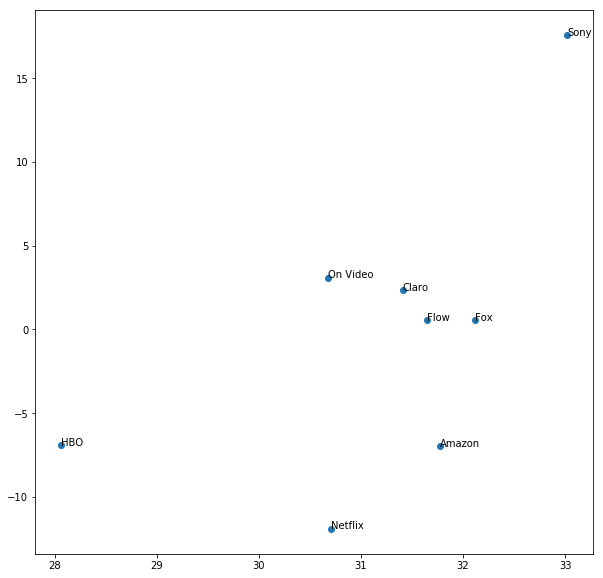

In [70]:
fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(clusters_transformed[:,0], clusters_transformed[:,1])

for i, txt in enumerate(platforms):
    ax.annotate(txt, (clusters_transformed[i,0], clusters_transformed[i,1]))

In [75]:
df_clusters_final_transpose

,7,23,4,21,8,20,12,19,10,6,...,2,11,16,14,18,13,22,5,1,17
percentage_clusters_hbo,15.000000,12.142857,12.142857,8.571429,8.571429,7.857143,7.857143,7.142857,5.714286,4.285714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
percentage_clusters_claro,2.445961,16.325370,14.789534,8.646189,6.427759,2.901024,14.562002,7.565415,7.963595,5.290102,...,0.284414,0.113766,0.056883,0.113766,0.056883,0.056883,0.000000,0.000000,0.00000,0.000000
percentage_clusters_sony,0.000000,16.071429,14.285714,7.142857,23.214286,0.000000,12.500000,0.000000,14.285714,5.357143,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
percentage_clusters_netflix,19.056487,18.621974,10.738672,6.641837,5.090006,2.669150,9.497207,7.200497,4.903786,2.855369,...,0.124146,0.000000,0.000000,0.000000,0.186220,0.000000,0.000000,0.186220,0.00000,0.000000
percentage_clusters_flow,4.545455,17.914439,14.705882,5.347594,8.556150,2.406417,12.032086,8.288770,7.486631,2.673797,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.26738,0.000000
percentage_clusters_amazon,8.268734,20.025840,13.178295,6.976744,5.297158,2.454780,10.335917,13.436693,3.488372,2.842377,...,0.258398,0.000000,0.000000,0.000000,0.000000,0.000000,0.387597,0.000000,0.00000,0.000000
percentage_clusters_on_video,2.547771,18.471338,12.420382,7.324841,6.369427,4.458599,13.057325,4.777070,8.917197,7.006369,...,2.229299,0.318471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.318471
percentage_clusters_fox,1.659751,20.331950,11.618257,4.564315,4.149378,4.149378,18.672199,6.639004,4.564315,6.224066,...,0.829876,0.000000,0.000000,0.414938,0.000000,0.000000,0.000000,0.414938,0.00000,0.000000


In [92]:
df_clusters_final.head(2)

,labels,percentage_clusters_hbo,percentage_clusters_claro,percentage_clusters_sony,percentage_clusters_netflix,percentage_clusters_flow,percentage_clusters_amazon,percentage_clusters_on_video,percentage_clusters_fox
0,7,15.000000,2.445961,0.000000,19.056487,4.545455,8.268734,2.547771,1.659751
1,23,12.142857,16.325370,16.071429,18.621974,17.914439,20.025840,18.471338,20.331950


In [77]:
df_clusters_final_comparison = df_clusters_final.copy()

In [78]:
df_clusters_final_comparison['claro_flow'] = df_clusters_final_comparison['percentage_clusters_claro'] - df_clusters_final_comparison['percentage_clusters_flow']

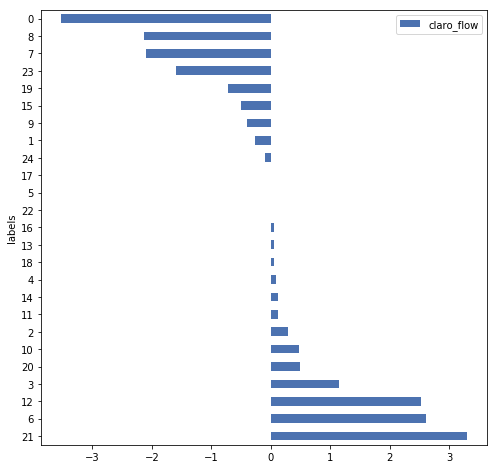

In [90]:
df_clusters_final_comparison.sort_values(by='claro_flow', ascending=False).plot("labels", "claro_flow", kind="barh", color=sns.color_palette("deep", 1), figsize=(8,8))

In [87]:
df_clusters_final_comparison['claro_netflix'] = df_clusters_final_comparison['percentage_clusters_claro'] - df_clusters_final_comparison['percentage_clusters_netflix']

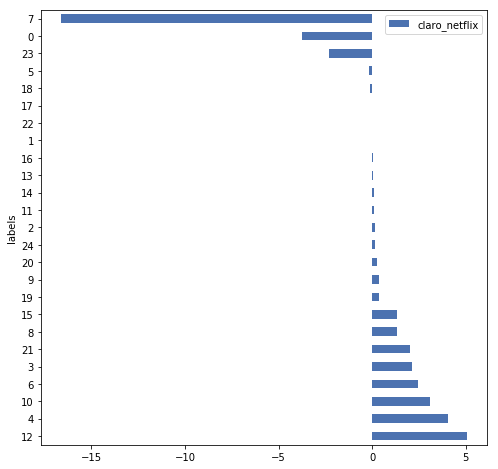

In [91]:
df_clusters_final_comparison.sort_values(by='claro_netflix', ascending=False).plot("labels", "claro_netflix", kind="barh", color=sns.color_palette("deep", 1),figsize=(8,8))